In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
# one hot encode all the output both train and test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# create and train model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train,
          y_train,
          validation_data=(X_test, y_test),
          epochs=5)

Epoch 1/5
1875/1875 [==============================] - 161s 84ms/step - loss: 0.3622 - accuracy: 0.9559 - val_loss: 0.0900 - val_accuracy: 0.9762
Epoch 2/5
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0571 - accuracy: 0.9827 - val_loss: 0.0780 - val_accuracy: 0.9786
Epoch 3/5
1875/1875 [==============================] - 141s 75ms/step - loss: 0.0412 - accuracy: 0.9873 - val_loss: 0.0951 - val_accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 137s 73ms/step - loss: 0.0322 - accuracy: 0.9905 - val_loss: 0.1079 - val_accuracy: 0.9784
Epoch 5/5
1875/1875 [==============================] - 139s 74ms/step - loss: 0.0302 - accuracy: 0.9910 - val_loss: 0.1222 - val_accuracy: 0.9742


# image transformations

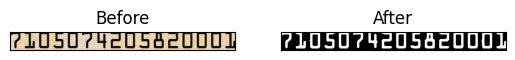

In [ ]:
img = cv2.imread('/content/drive/MyDrive/ktp_edited/NIK.png') # tambah argument '0' bila ingin diubah jdi grayscale

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7, 7), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
#kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 13))
#dilate = cv2.dilate(thresh, kernal, iterations=1)

# codingan asli
# img = cv2.medianBlur(img, 5)
# ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

titles = ['Before', 'After']
images = [img, thresh]
for i in range(2):
  plt.subplot(2, 2, i+1), plt.imshow(images[i], 'gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# kernels for morphological transformations
# kernel = np.ones((10,10),np.uint8)
# kernel1 = np.ones((1,1),np.uint8)

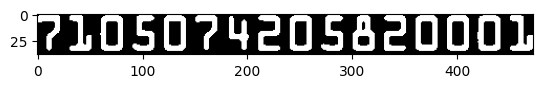

number of digits in the number :  16


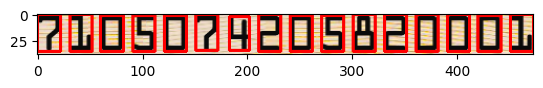

In [ ]:
# image = cv2.imread('/content/drive/MyDrive/ktp_edited/NIK.png')
# grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(grey.copy(), 170, 255, cv2.THRESH_BINARY_INV)

# thresh = cv2.erode(thresh, kernel1, iterations=1)
# thresh = cv2.dilate(thresh, kernel1, iterations=2)
plt.imshow(thresh, cmap='gray')
plt.show()
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])
preprocessed_digits = []
i = 0
for c in contours:
  x, y, w, h = cv2.boundingRect(c)
  cv2.rectangle(img, (x, y), (x+w, y+h), color=(255, 0, 0), thickness=2)
  digit = thresh[y:y+h, x:x+w]
  i += 1
  resized_digit = cv2.resize(digit, (18, 18))
  padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), 'constant', constant_values=0)
  preprocessed_digits.append(padded_digit)

print('number of digits in the number : ', i)
plt.imshow(img, cmap="gray")
plt.show()

1/1 [==============================] - 0s 96ms/step


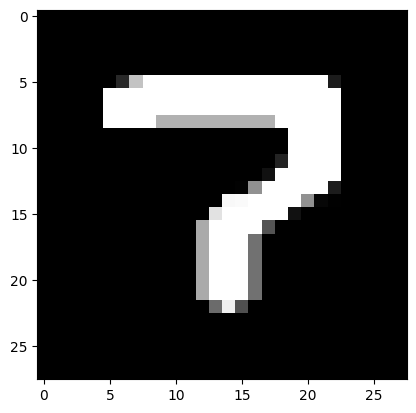



 Prediction of digit number 1 : 2


---------------------------------------


1/1 [==============================] - 0s 23ms/step


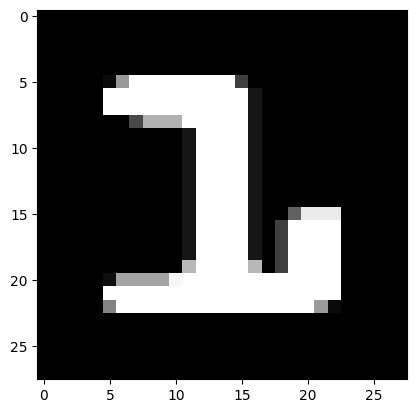



 Prediction of digit number 2 : 3


---------------------------------------


1/1 [==============================] - 0s 25ms/step


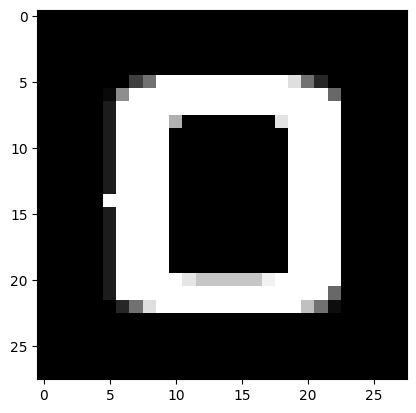



 Prediction of digit number 3 : 0


---------------------------------------


1/1 [==============================] - 0s 29ms/step


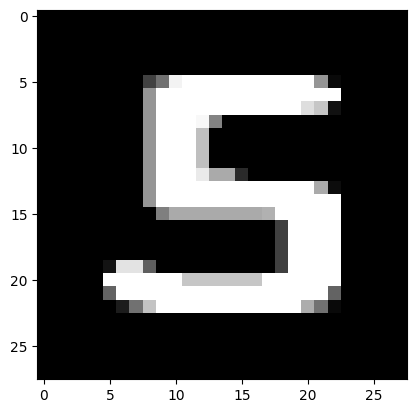



 Prediction of digit number 4 : 5


---------------------------------------


1/1 [==============================] - 0s 22ms/step


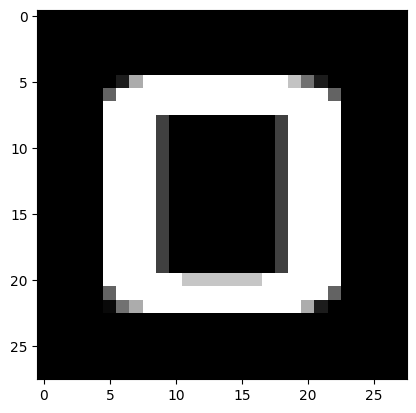



 Prediction of digit number 5 : 0


---------------------------------------


1/1 [==============================] - 0s 20ms/step


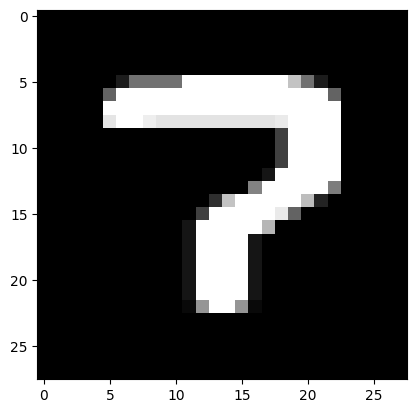



 Prediction of digit number 6 : 2


---------------------------------------


1/1 [==============================] - 0s 25ms/step


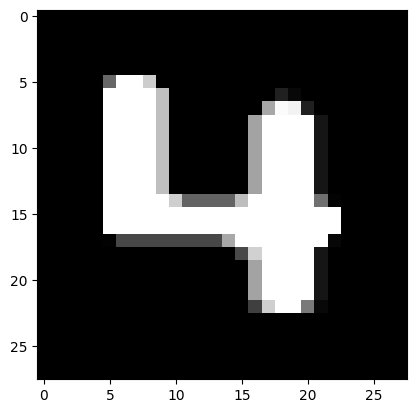



 Prediction of digit number 7 : 4


---------------------------------------


1/1 [==============================] - 0s 20ms/step


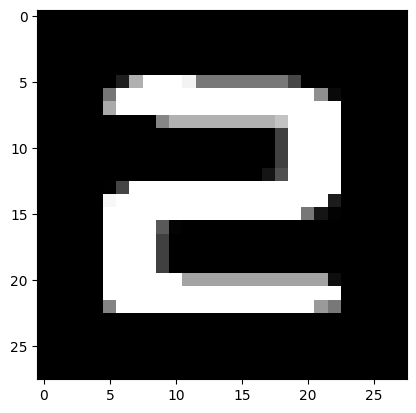



 Prediction of digit number 8 : 2


---------------------------------------


1/1 [==============================] - 0s 20ms/step


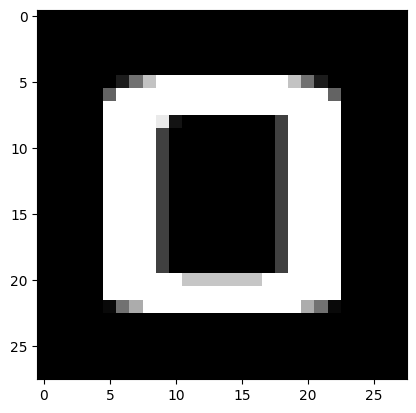



 Prediction of digit number 9 : 0


---------------------------------------


1/1 [==============================] - 0s 30ms/step


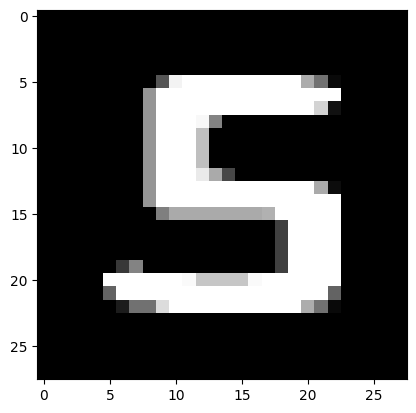



 Prediction of digit number 10 : 5


---------------------------------------


1/1 [==============================] - 0s 31ms/step


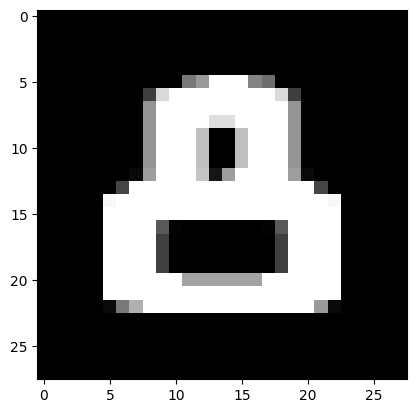



 Prediction of digit number 11 : 0


---------------------------------------


1/1 [==============================] - 0s 31ms/step


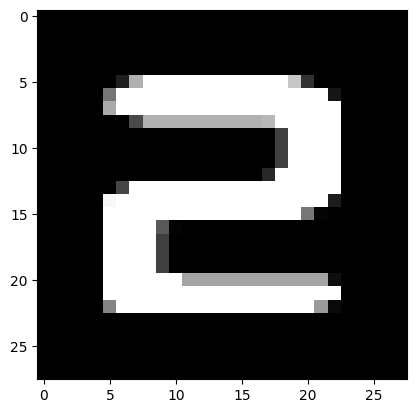



 Prediction of digit number 12 : 2


---------------------------------------


1/1 [==============================] - 0s 40ms/step


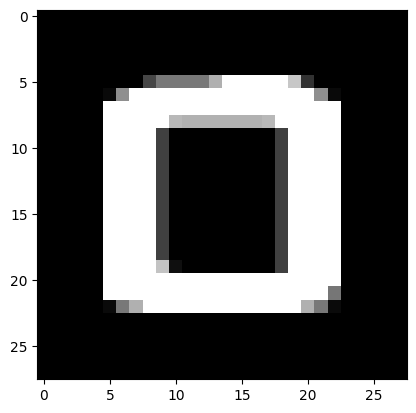



 Prediction of digit number 13 : 0


---------------------------------------


1/1 [==============================] - 0s 30ms/step


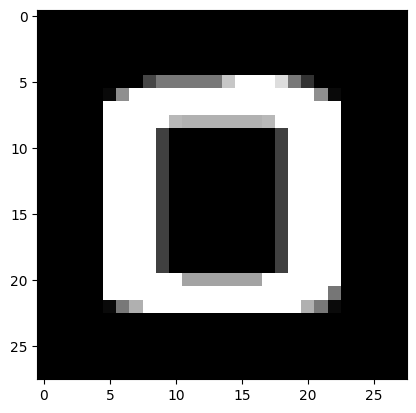



 Prediction of digit number 14 : 0


---------------------------------------


1/1 [==============================] - 0s 36ms/step


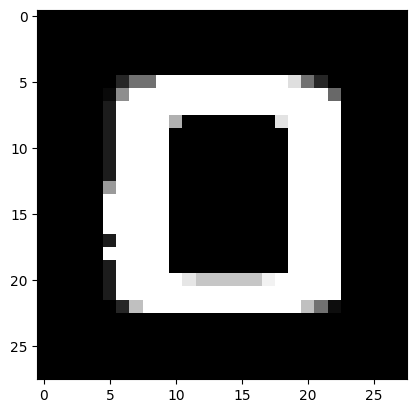



 Prediction of digit number 15 : 0


---------------------------------------


1/1 [==============================] - 0s 33ms/step


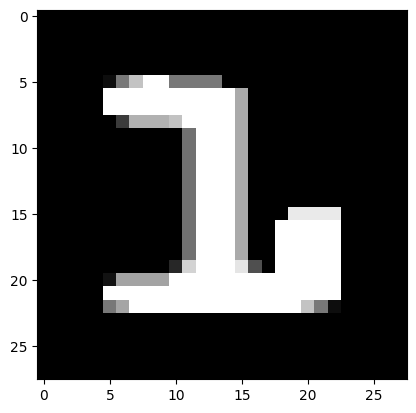



 Prediction of digit number 16 : 3


---------------------------------------




In [ ]:
final_num = 'The final predicted number is : '
index = 0
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))   # the first 1 signifies the batch size, the last 1 signifies greyscale image
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\n Prediction of digit number {} : {}".format(index+1,np.argmax(prediction)))
    index +=1
    final_num += str(np.argmax(prediction))
    print ("\n\n---------------------------------------\n\n")

In [ ]:
print(f'Predicted NIK: {final_num}')

Predicted NIK: The final predicted number is : 2305024205020003
